In [299]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [300]:
str_filename = 'dune_artblocks_mints.csv'

In [301]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [302]:
#writer = csv.writer(fh, delimiter=',')
#writer.writerow( ['ID'] + next(csv_reader))
#writer.writerows([i] + row for i, row in enumerate(csv_reader2, 1))

In [303]:
csv_reader = csv.reader(fh)
csv_header = next(csv_reader)
#csv_header.append('temp')

In [304]:
fh.close()

In [305]:
df_temp = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
i = 0
for row in df_temp['time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_temp.at[i, 'time'] = row
    i += 1
df_temp

,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,projectid,tokenid,tx_hash,mint_count
0,2022-08-09 21:30:26,Gels by Jason Brown,0.15,256.4190,0.0,0.0,0.000209,Factory,322,322000132,\x657b0e82d8e891d414e853f70eedb9a3d585b6db2b4f...,1
1,2022-08-09 21:27:20,THE SOURCE CoDE by O,0.20,341.8920,0.0,0.0,0.000153,Factory,187,187000165,\xc2b38ee0431f08dfbf60c9a371eb2759af769b17b463...,1
2,2022-08-09 21:24:21,Facets by conundrume,0.10,170.6110,0.0,0.0,0.000153,Factory,249,249000222,\x5e954524f1505cb1a71cfd6580bf7d9a248e885b6b57...,1
3,2022-08-09 21:01:56,Swing by Eltono,0.15,255.0600,0.0,0.0,0.000207,Factory,184,184000249,\x10e9f2c68f9254fa1e394b0dc98bd30c34a0ad0ba81b...,1
4,2022-08-09 17:07:06,8 by Bård Ionson,0.18,304.5492,0.0,0.0,0.000159,Factory,179,179000105,\x24a35c0cbcf342fbeded159696463339b578b65fe535...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44890,2022-01-01 03:26:49,Dream Engine by REMO,0.10,373.1310,0.0,0.0,0.014069,Factory,223,223000265,\xbdc649a4b50067b30675568bd5337b0c1356c3c019c9...,1
44891,2022-01-01 02:50:44,Freehand by WAWAA,0.12,447.8640,0.0,0.0,0.014876,Factory,211,211000164,\xf379b87e7bd9d8214790fc17e564cf545aff708f71e6...,1
44892,2022-01-01 01:11:00,CryptoNewYorker by Q,0.00,0.0000,0.0,0.0,0.021243,Factory,189,189000984,\xd50846180a99ba101219e33d4eb2b425d0bcf5530994...,1
44893,2022-01-01 00:58:00,Attraction by Jos Vr,0.15,558.3630,0.0,0.0,0.013791,Factory,229,229000312,\x68d37300a53c2d1f7c683af5bb87010bde0a0027f1ad...,1


In [306]:
#df_sig = df_temp.loc[(df_temp['project_type'] == 'Curated')]
df_sig = df_temp
df_sig['Date'] = df_sig['time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_sig['eth_total']

0        0.15
1        0.20
2        0.10
3        0.15
4        0.18
         ... 
44890    0.10
44891    0.12
44892    0.00
44893    0.15
44894    0.00
Name: eth_total, Length: 44895, dtype: float64

In [307]:
#df_sig = df_sig.set_index('projectid')
df_sig = df_sig.groupby('projectid').min().reset_index()
df_sig = df_sig.loc[(df_sig['eth_total'] != 0)]
#f_sig['eth_total'] = (df_sig['eth_total'] / df_sig['mint_count'])
df_sig

,projectid,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,tokenid,tx_hash,mint_count,Date
0,0,2022-01-07 12:16:15,Chromie Squiggle by,NaN,0.000000,0.000000,0.000000,NaN,Curated,9247,\x097e804a4b6fac218c954ab876072491221e377e88ad...,1,2022-01-07 12:16:15
2,168,2022-05-31 15:18:02,Bloom by Blockchance,0.250000,285.410000,0.000000,0.000000,0.000194,Factory,168000277,\x15d6a2af8a7f7cc735afe2936c5c504d4873c804ac56...,1,2022-05-31 15:18:02
3,170,2022-01-04 06:14:28,Chroma Theory by Paw,0.100000,240.386000,0.000000,0.000000,0.012810,Factory,170000083,\x03b2ae4222692ca4280c3b3d1d2a32cf84063c48aa5c...,1,2022-01-04 06:14:28
4,177,2022-01-26 20:16:28,Space Birds by Mark,0.250000,625.535000,0.000000,0.000000,0.013088,Factory,177000042,\x43248c3198383aa1b414e668a1382c46404d33d239d8...,1,2022-01-26 20:16:28
6,181,2022-01-01 19:58:29,FOCUS by Matto,0.120000,124.573200,0.000000,0.000000,0.000122,Factory,181000168,\x0193546a29bc0a5558ef1b37be15430c56f197299773...,1,2022-01-01 19:58:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,335,2022-08-05 17:00:44,Scribblines by null,0.150000,250.909500,0.000000,0.000000,0.000082,Factory,335000001,\x015aac6ddd8c85ceb99424da71ce45c5a41e4f995b0b...,1,2022-08-05 17:00:44
133,336,2022-08-03 15:40:01,Polychrome Music by,0.250000,415.502500,0.000000,0.000000,0.000172,Factory,336000001,\x14e5695f43847063ff5fc4b1a73b674ccb5998eae553...,1,2022-08-03 15:40:01
134,338,2022-08-03 17:00:44,undead wyverns by hi,0.700000,1050.054018,0.062237,103.654530,0.000048,Factory,338000001,\x003bf4edbcfe7499b694b00020b0b26a0424cf01a690...,1,2022-08-03 17:00:44
136,340,2022-08-08 17:16:16,Vahria by Darien Bri,0.596618,953.501314,0.058816,104.279169,0.000054,Playground,340000001,\x01d5a437bd13cc43bbc366cf92d934cfd328e289cdd2...,1,2022-08-08 17:16:16


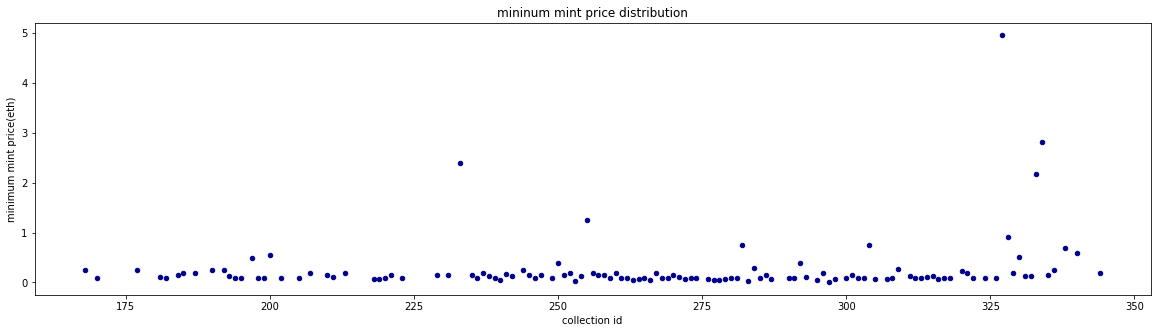

In [273]:
ax1 = df_sig.plot.scatter(x='projectid', y='eth_total',c='DarkBlue', xlabel="collection id", ylabel="minimum mint price(eth)"
                         ,title="mininum mint price distribution")